In [1]:
import numpy as np
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import cv2
import random
import shutil
import math

# DATA EXTRACTION

In [41]:
with zipfile.ZipFile('new_crop_data.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_new_crop_data_splitted') #extracting data from jploaded zip file

In [2]:
#declaring the paths
train_path="extracted_new_crop_data_splitted/new_crop_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
validation_path="extracted_new_crop_data_splitted/new_crop_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_path="extracted_new_crop_data_splitted/new_crop_data/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/test"

In [82]:
#splitting the validation data since test data was not given
for class_name in os.listdir(validation_path):
    valid_class_dir = os.path.join(validation_path, class_name)
    test_class_dir = os.path.join(test_path, class_name)
    os.makedirs(test_class_dir, exist_ok=True)
    images = os.listdir(valid_class_dir)
    num_test_images = math.ceil(len(images) * 0.4)
    test_images = random.sample(images, num_test_images)
    for image in test_images:
        src = os.path.join(valid_class_dir, image)
        dst = os.path.join(test_class_dir, image)
        shutil.move(src, dst)

KeyboardInterrupt: 

# TRAINING MODEL

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [4]:
datagen=ImageDataGenerator(rescale=(1/255)) #normalize

In [5]:
#define data genrators
train_generator=datagen.flow_from_directory(
    train_path,
    target_size=(256,256),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
)

Found 70295 images belonging to 38 classes.


In [6]:
validation_generator=datagen.flow_from_directory(
    validation_path,
    target_size=(256,256),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
)

Found 17572 images belonging to 38 classes.


In [7]:
test_generator=datagen.flow_from_directory(
    test_path,
    target_size=(256,256),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
)

Found 7040 images belonging to 38 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Activation,Conv2D, MaxPooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import  regularizers
from keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization

In [29]:
#define model architecture
model = Sequential([
    Input(shape=(256, 256, 3)), 
    
    Conv2D(16, (3, 3),padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    SeparableConv2D(32, (3, 3),padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    SeparableConv2D(64, (3, 3),padding='same'),
    Activation('relu'),
      BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    SeparableConv2D(128, (3, 3),padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    SeparableConv2D(256, (3, 3),padding='same'),
    Activation('relu'),
      BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    
    SeparableConv2D(512, (3, 3),padding='same'),
    Activation('relu'),
      BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    
    GlobalAveragePooling2D(),
    Dense(512, kernel_regularizer=regularizers.l2(0.0005)),
      BatchNormalization(),
    Activation('relu'),
    Dropout(0.6),
    
    Dense(256, kernel_regularizer=regularizers.l2(0.0001)),
      BatchNormalization(),
    Activation('relu'),
    Dropout(0.6),
    
    Dense(128, kernel_regularizer=regularizers.l2(0.0001)),
      BatchNormalization(),
    Activation('relu'),
    Dropout(0.7),
    
    Dense(38),
    Activation('softmax') 
])

In [30]:
from tensorflow.keras.optimizers import Adam
#complie
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 256, 256, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_10                  │ (None, 128, 128, 32)        │             688 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_11                  │ (None, 64, 64, 64)          │           2,400 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_12                  │ (None, 32, 32, 128)         │           8,896 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_13                  │ (None, 16, 16, 256)         │          34,176 │
│ (SeparableConv2D)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 619,190 (2.36 MB)

 Trainable params: 615,734 (2.35 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [32]:
train_datagen = ImageDataGenerator(rescale=0.2, validation_split=0.2)
validation_datagen = ImageDataGenerator(rescale=0.2, validation_split=0.2)

In [33]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint('best_modeltr.keras', monitor='val_loss', save_best_only=True, mode='min')

In [34]:
print(train_generator.samples // train_generator.batch_size)
print(validation_generator.samples // validation_generator.batch_size)

2196
549


In [35]:
epochs = 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[reduce_lr, early_stopping, checkpoint]
)

Epoch 1/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 597s 270ms/step - accuracy: 0.0430 - loss: 4.5461 - val_accuracy: 0.1873 - val_loss: 3.4161 - learning_rate: 1.0000e-04
Epoch 2/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 609s 277ms/step - accuracy: 0.1057 - loss: 3.6865 - val_accuracy: 0.2907 - val_loss: 2.9166 - learning_rate: 1.0000e-04
Epoch 3/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 577s 263ms/step - accuracy: 0.1973 - loss: 3.1144 - val_accuracy: 0.3195 - val_loss: 2.5391 - learning_rate: 1.0000e-04
Epoch 4/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 578s 263ms/step - accuracy: 0.2847 - loss: 2.6618 - val_accuracy: 0.3016 - val_loss: 2.5358 - learning_rate: 1.0000e-04
Epoch 5/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 568s 258ms/step - accuracy: 0.3723 - loss: 2.3043 - val_accuracy: 0.4031 - val_loss: 2.1637 - learning_rate: 1.0000e-04
Epoch 6/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 574s 261ms/step - accuracy: 0.4411 - loss: 2.0264 - val_accuracy: 0.5672 - val_loss: 1.6548 - learning_rate: 1.0000e-04
Epoch 7/50
2197/2197 ━━━━━━━

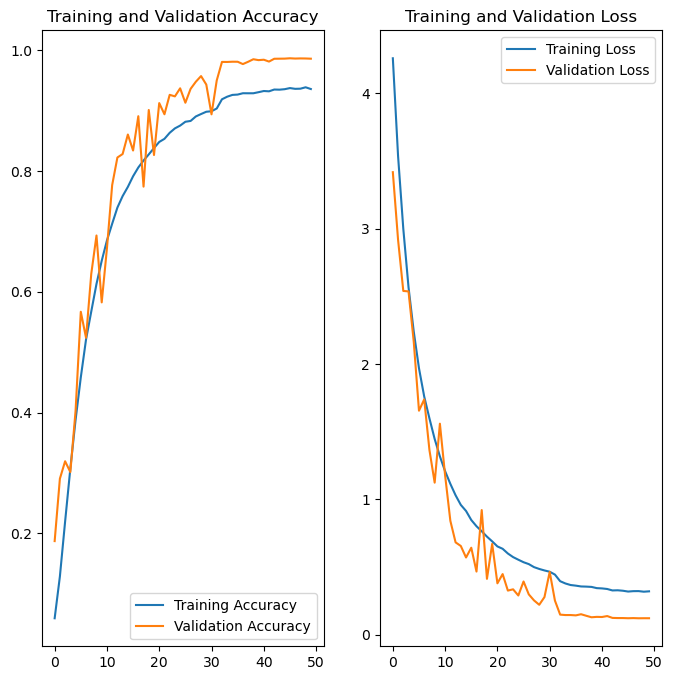

In [36]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


determined validation accuracy decrease after 9 epochs

# CROSS VALIDATION

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, SeparableConv2D, MaxPooling2D, Dense, Dropout, Activation, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

def create_model(input_shape=(256, 256, 3), num_classes=38):
    model = Sequential([
        Input(shape=input_shape),
        
        Conv2D(16, (3, 3), padding='same'),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        SeparableConv2D(32, (3, 3), padding='same'),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        SeparableConv2D(64, (3, 3), padding='same'),
        Activation('relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        SeparableConv2D(128, (3, 3), padding='same'),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        SeparableConv2D(256, (3, 3), padding='same'),
        Activation('relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.5),
        
        SeparableConv2D(512, (3, 3), padding='same'),
        Activation('relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.5),
        
        GlobalAveragePooling2D(),
        Dense(512, kernel_regularizer=regularizers.l2(0.0005)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.6),
        
        Dense(256, kernel_regularizer=regularizers.l2(0.0001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.6),
        
        Dense(128, kernel_regularizer=regularizers.l2(0.0001)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(0.7),
        
        Dense(num_classes),
        Activation('softmax') 
    ])
    
    return model

for fold, (train_index, val_index) in enumerate(kf.split(all_files), 1):
    print(f"Fold {fold}")
    
    train_generator=datagen.flow_from_directory(
    train_path,
    target_size=(256,256),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
    )
    
    validation_generator=datagen.flow_from_directory(
    validation_path,
    target_size=(256,256),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
    )
    model = create_model(input_shape=(256, 256, 3), num_classes=38)
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(
        train_generator,
        epochs=50,
        validation_data=val_generator,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
            tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6)
        ]
    )
    
    val_loss, val_accuracy = model.evaluate(val_generator)
    cv_scores.append(val_accuracy)
    
    print(f"Fold {fold} - Validation Accuracy: {val_accuracy:.4f}")

print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

Fold 1
Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Epoch 1/50


D:\conda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 608s 274ms/step - accuracy: 0.0386 - loss: 4.6460 - val_accuracy: 0.1770 - val_loss: 3.4297 - learning_rate: 1.0000e-04
Epoch 2/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 615s 280ms/step - accuracy: 0.1026 - loss: 3.7175 - val_accuracy: 0.2316 - val_loss: 3.0435 - learning_rate: 1.0000e-04
Epoch 3/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 625s 284ms/step - accuracy: 0.1968 - loss: 3.1448 - val_accuracy: 0.3067 - val_loss: 2.6082 - learning_rate: 1.0000e-04
Epoch 4/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 606s 276ms/step - accuracy: 0.2741 - loss: 2.7174 - val_accuracy: 0.4932 - val_loss: 2.0537 - learning_rate: 1.0000e-04
Epoch 5/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 611s 278ms/step - accuracy: 0.3566 - loss: 2.3608 - val_accuracy: 0.6168 - val_loss: 1.6083 - learning_rate: 1.0000e-04
Epoch 6/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 608s 277ms/step - accuracy: 0.4330 - loss: 2.0556 - val_accuracy: 0.6389 - val_loss: 1.4288 - learning_rate: 1.0000e-04
Epoch 7/50
2197/2197 ━━━━━━━━━━━━━━━━━━

# FINE TUNING

In [67]:
model = create_model(input_shape=(256, 256, 3), num_classes=38)
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0005)

In [69]:
history_finetune = model.fit(
    train_generator,
    epochs=35,  
    validation_data=validation_generator,  
    callbacks=[early_stopping,reduce_lr]
)

Epoch 1/35
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 773s 346ms/step - accuracy: 0.1207 - loss: 3.6913 - val_accuracy: 0.4090 - val_loss: 2.1121 - learning_rate: 0.0010
Epoch 2/35
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 788s 358ms/step - accuracy: 0.4361 - loss: 2.0092 - val_accuracy: 0.6205 - val_loss: 1.4385 - learning_rate: 0.0010
Epoch 3/35
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 815s 371ms/step - accuracy: 0.6256 - loss: 1.4450 - val_accuracy: 0.7697 - val_loss: 0.9636 - learning_rate: 0.0010
Epoch 4/35
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 802s 365ms/step - accuracy: 0.7221 - loss: 1.1700 - val_accuracy: 0.7593 - val_loss: 1.0115 - learning_rate: 0.0010
Epoch 5/35
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 751s 342ms/step - accuracy: 0.7756 - loss: 1.0339 - val_accuracy: 0.6516 - val_loss: 1.4752 - learning_rate: 0.0010
Epoch 6/35
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 741s 337ms/step - accuracy: 0.8018 - loss: 0.9668 - val_accuracy: 0.9235 - val_loss: 0.5463 - learning_rate: 0.0010
Epoch 7/35
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 741s 337ms

tuning accuracy reached 10% at 0.0001 optimizer and lr 0.00001 at 30 epochs,
increased learning rate to 0.001 and reduce_lr to 0.0005 , epochs 35

In [70]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

220/220 ━━━━━━━━━━━━━━━━━━━━ 61s 279ms/step - accuracy: 0.9879 - loss: 0.2133
Test accuracy: 0.9901


In [71]:
# Save the fine-tuned model
final_model_path = 'crop_tuned_model.keras'
model.save(final_model_path)
print(f"Fine-tuned model saved at {final_model_path}")

Fine-tuned model saved at crop_tuned_model.keras


In [83]:
predictions = model.predict(test_generator)
confidence_scores = np.max(predictions, axis=1)
average_confidence = np.mean(confidence_scores)
print(f"Average confidence level: {average_confidence:.4f}")

220/220 ━━━━━━━━━━━━━━━━━━━━ 55s 247ms/step
Average confidence level: 0.9865


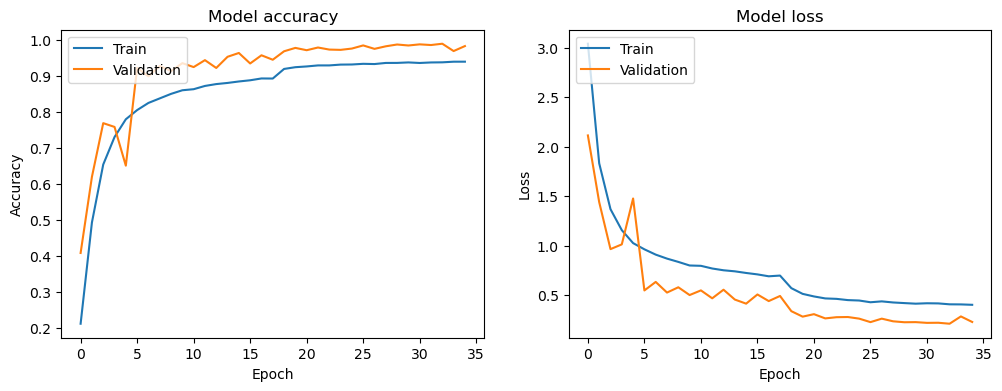

In [81]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_finetune.history['accuracy'])
plt.plot(history_finetune.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_finetune.history['loss'])
plt.plot(history_finetune.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Dataset taken from kaggle, the dataset conatined 70000 and 17000 traing and validation images with respective 38 classes.
due to lack of testing data validation data is splitted as per requirement to form testing data.
data generators used for sommoth flow of data from directory.
Model architecture defined and it's refined gradually by looking at the training performances along with training speed,
no pre trained model is used.
cross validation for the model shows 98.94% accuracy
after tuning final model has an 99.01 % of accuracy.

Average confidence level for the test set as per the model is 98.65%

# dataset link : https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset?select=New+Plant+Diseases+Dataset%28Augmented%29

# Description about Model architecture

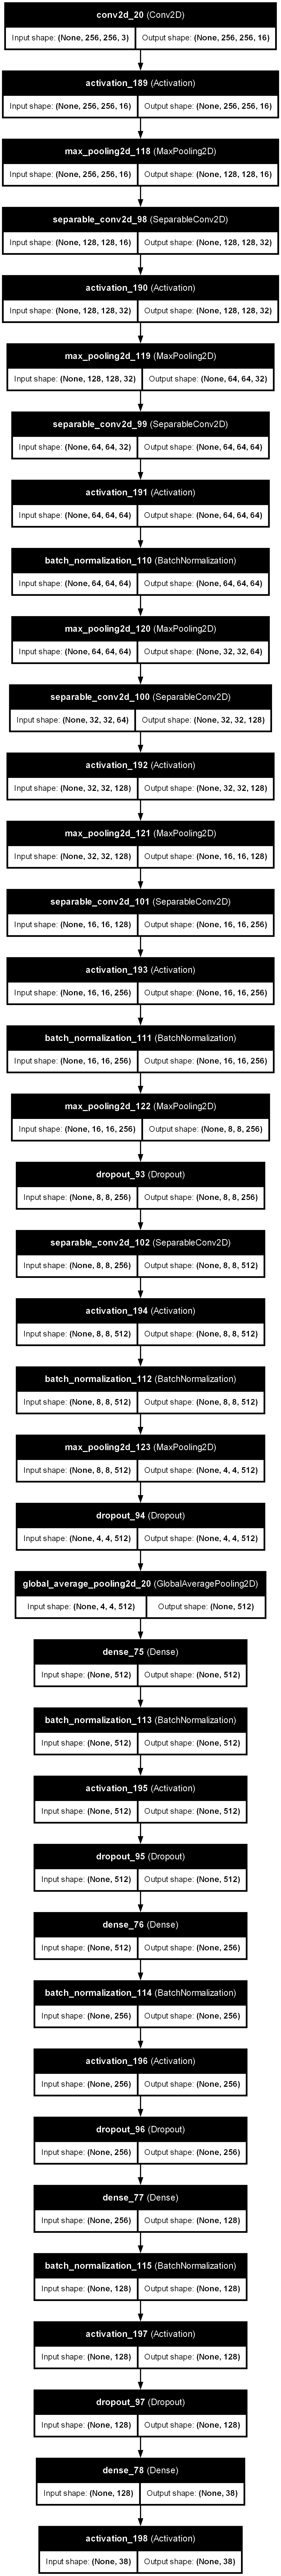

In [84]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model_plot.png')